In [79]:
# imports
import numpy as np
import plotly.express as px
import pandas as pd
df = pd.read_csv('mammographic_masses_data.csv')


In [12]:
# 1.1 Showing the first 5 rows of the dataset
df.head()

,BA,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [13]:
# 2.2 Show the points in the dataset where the Severity is 1
loc_df = df.loc[df['Severity'] == 1] #can choose to only show specific characteristics with severity == 1
print(loc_df)

      BA   Age  Shape  Margin  Density  Severity
0    5.0  67.0    3.0     5.0      3.0         1
1    4.0  43.0    1.0     1.0      NaN         1
2    5.0  58.0    4.0     5.0      3.0         1
4    5.0  74.0    1.0     5.0      NaN         1
8    5.0  57.0    1.0     5.0      3.0         1
..   ...   ...    ...     ...      ...       ...
951  5.0  67.0    4.0     5.0      3.0         1
952  4.0  68.0    4.0     4.0      3.0         1
955  4.0  52.0    4.0     4.0      3.0         1
957  4.0  56.0    4.0     5.0      3.0         1
959  5.0  66.0    4.0     5.0      3.0         1

[445 rows x 6 columns]


In [16]:
df.describe()


,BA,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.300313,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.683469,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [20]:

freq_BA = df['BA'].value_counts()
freq_Shape = df['Shape'].value_counts()
freq_Margin = df['Margin'].value_counts()
freq_Density = df['Density'].value_counts()
freq_Severity = df['Severity'].value_counts()


# Print the frequency counts
print(freq_BA)
print(freq_Shape)
print(freq_Margin)
print(freq_Density)
print(freq_Severity)

4.0    547
5.0    346
3.0     36
2.0     14
6.0     11
1.0      4
0.0      1
Name: BA, dtype: int64
4.0    400
1.0    224
2.0    211
3.0     95
Name: Shape, dtype: int64
1.0    357
4.0    280
5.0    136
3.0    116
2.0     24
Name: Margin, dtype: int64
3.0    798
2.0     59
1.0     16
4.0     12
Name: Density, dtype: int64
0    516
1    445
Name: Severity, dtype: int64


Which functions do you think everyone should be aware of to render out summary 
statistics? 
Mean: average of the given numbers (only for Age)
Standard deviation: the average variability in the given numbers (for age and all of other factor variables, discrete values)
Min: the lowest value for the given numbers in our dataset (range)
Max: the maximum value for the given numbers in our dataset (range)

percentiles? i don't find them so relevant 

in the case of the ordinal variables (BA, Shape, Margin, Density and Severity), the frequency of the

<bound method Series.count of 0      3.0
1      NaN
2      3.0
3      3.0
4      NaN
      ... 
956    3.0
957    3.0
958    3.0
959    3.0
960    3.0
Name: Density, Length: 961, dtype: float64>

In [10]:
import plotly.express as px

severity_density_counts = df.groupby(['Severity', 'Density']).size().reset_index(name='Count')

fig = px.bar(severity_density_counts, x="Severity", y="Count", color="Density")

fig.show()


In [47]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('mammographic_masses_data.csv')

# Display the first few rows of the dataframe to understand its structure
# print(df.head())

# Extract features and target
# Features: BA, Shape, Margin, Density
# Target: Severity
X = df[['BA', 'Shape', 'Margin', 'Density', 'Age']]
y = df['Severity']

# Handle missing values
# Drop rows with missing values for simplicity
# You might also consider imputation or other strategies
X = X.dropna()
y = y[X.index]  # Align target with the feature rows after dropping

# Optionally, split the data into training and test sets
# This is not strictly necessary for feature selection but is good practice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SelectKBest to select the top 2 features
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)

print(X.shape)
# Check the shape of the transformed dataset
print(X_new.shape)

# print(df.head())

# Optionally, you can inspect the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

#Best feature is Margin, 2nd is Shape, 3rd BA, 4th Age

(830, 5)
(581, 2)
Selected features: Index(['Shape', 'Margin'], dtype='object')


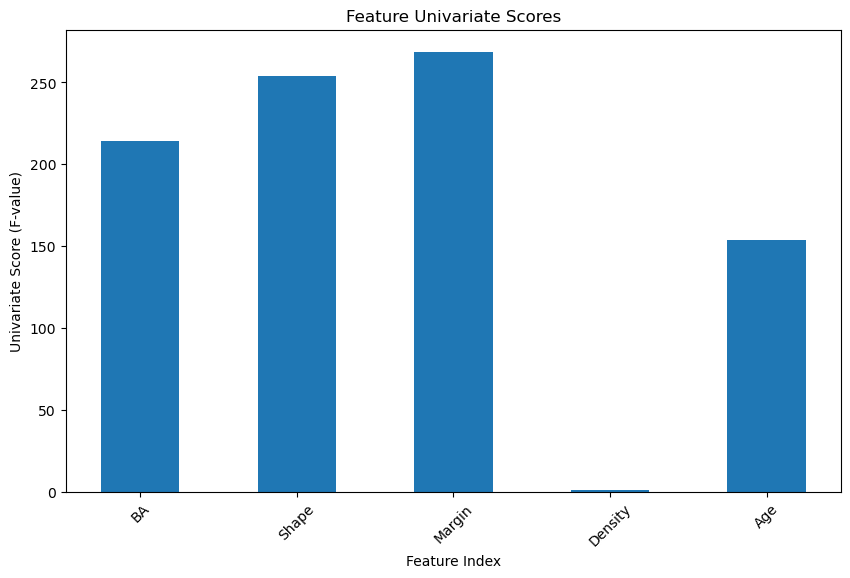

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Fit the feature selector to get the scores
selector = SelectKBest(f_classif, k='all')  # Set k='all' to get scores for all features
selector.fit(X_train, y_train)

# Get the scores for each feature
scores = selector.scores_

# Indices for the features
X_indices = np.arange(X.shape[1])

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(X_indices, scores, width=0.5)
plt.title("Feature Univariate Scores")
plt.xlabel("Feature Index")
plt.ylabel("Univariate Score (F-value)")
plt.xticks(X_indices, X.columns, rotation=45)
plt.show()


In [76]:
import plotly.graph_objects as go

# Create a bar chart with Plotly
fig = go.Figure()
feature_names = ['BA', 'Shape', 'Margin', 'Density', 'Age']  # Replace with your actual feature names


fig.add_trace(go.Bar(
    x=X_indices,
    y=scores,
    marker=dict(color='royalblue')
))

fig.update_layout(
    title="Feature Univariate Scores",
    xaxis_title="Feature",
    yaxis_title="Univariate Score (F-value)",
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for readability
        tickmode='array',  # Use array of labels for x-axis
        tickvals=list(range(len(feature_names))),  # Use integer indices for tick positions
        ticktext=feature_names  # Use feature names as tick labels
    )
)

# Show the plot
fig.show()

In [69]:
X = df[['BA', 'Shape', 'Margin', 'Density', 'Age']]
y = df['Severity']

# Handle missing values
# Drop rows with missing values for simplicity
# You might also consider imputation or other strategies
X = X.dropna()
y = y[X.index]  # Align target with the feature rows after dropping

import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[9.82524330e-01 1.32145518e-02 2.24661812e-03 1.46435029e-03
 5.50149740e-04]
[423.13882423  49.07241572  20.23372519  16.33554797  10.01271084]


In [74]:
import plotly.express as px
features = ['BA', 'Shape', 'Margin', 'Density', 'Age']

fig = px.scatter_matrix(
    df,
    dimensions=features, 
    color= "Severity"
)
fig.update_traces(diagonal_visible=False)
fig.show()


/Users/giovanna/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [82]:
import plotly.express as px
from sklearn.decomposition import PCA


df.dropna(inplace=True)
X = df[['BA', 'Shape', 'Margin', 'Density', 'Age']]


pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['Severity'])
fig.show()

In [85]:
total_var = pca.explained_variance_ratio_.sum() * 100

X = df[['BA', 'Shape', 'Margin', 'Density', 'Age']]
pca2 = PCA(n_components=3)
components = pca2.fit_transform(X)

fig2 = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Density'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig2.show()

In [88]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)


X = df[['BA', 'Shape', 'Margin', 'Density', 'Age']]
y = df['Severity']

X = X.dropna()
y = y[X.index]  # Align target with the feature rows after dropping

import numpy as np
from sklearn.decomposition import PCA
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)


[0.9767409  0.01408056]
0.9908214642551482
[1672.19615562   50.8374914 ]


[9.82524330e-01 1.32145518e-02 2.24661812e-03 1.46435029e-03
 5.50149740e-04]
[423.13882423  49.07241572  20.23372519  16.33554797  10.01271084]

In [89]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
 
# Load your dataset
data = pd.read_csv('mammographic_masses_data.csv')
 
# Handle missing values (e.g., fill with 0 or mean)
data = data.fillna(0)
 
# Select specific columns for Truncated SVD
columns_for_svd = ['BA', 'Margin', 'Density', 'Age', 'Shape', 'Severity']
X = data[columns_for_svd].values
 
# Number of components to reduce to
n_components = 2
 
# Apply Truncated SVD
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X)
 
fig_svd = px.scatter(x=X_svd[:, 0], y=X_svd[:, 1], color=data['Severity'])
 
fig_svd.show()
# Check the shape of the transformed dataset
 
 
# Print the transformed dataset
print(X_svd)

[[67.48711386  1.28007552]
 [43.13912851 -1.39119761]
 [58.58638389  2.70405844]
 ...
 [64.46932954  1.67193489]
 [66.53906183  1.93448886]
 [62.34068819 -0.0967875 ]]
